In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/f56/991/de5/seeds.csv")
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [4]:
#removing categoriccal variable 
del df['grain_variety']

In [5]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [10]:
df.describe()
#This data is based on specifications of a seed

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [11]:
X = df.iloc[:,[3,4]].values

Text(0, 0.5, 'Width')

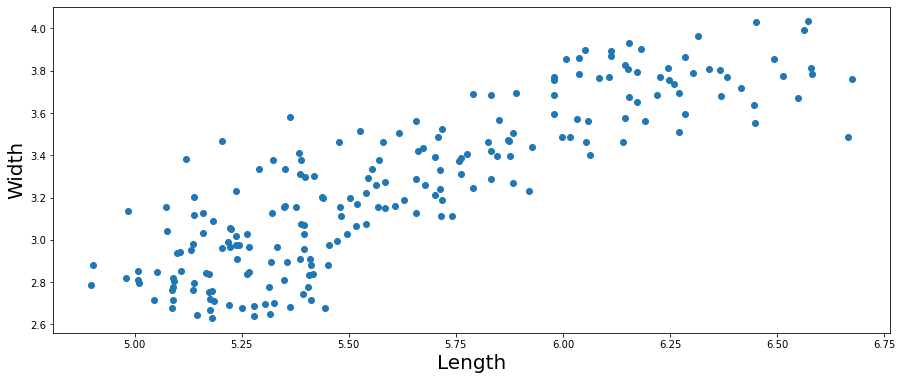

In [9]:
#Initial view of the Data
plt.figure(figsize=(15,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Length',fontsize=20)
plt.ylabel('Width',fontsize=20)

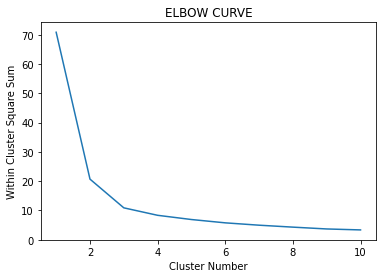

In [13]:
#Finding the optimum clusters using the ELBOW CURVE
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Cluster Number")
plt.ylabel("Within Cluster Square Sum")
plt.show()

In [14]:
#Fitting the model
#Elbow curve gives the optimal number of clusters i.e at Cluster Number = 3
kmean = KMeans(n_clusters=3,random_state=0)
y_kmean_clustering = kmean.fit_predict(X)

In [15]:
y_kmean_clustering

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

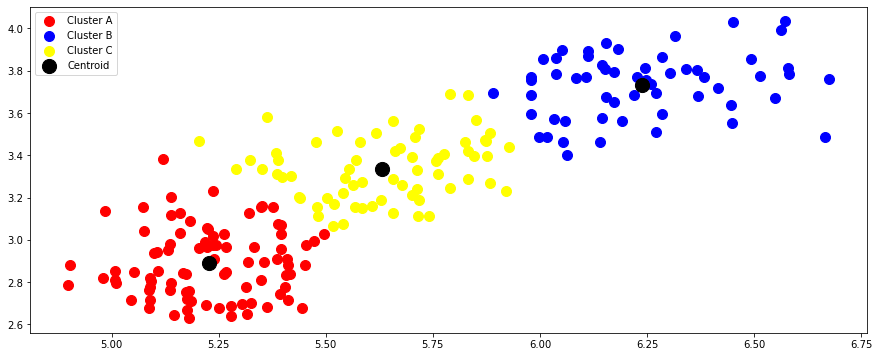

In [18]:
#Visualizing results

plt.figure(figsize=(15,6))
plt.scatter(X[y_kmean_clustering==0,0],X[y_kmean_clustering==0,1],s=100,c='red',label='Cluster A')
plt.scatter(X[y_kmean_clustering==1,0],X[y_kmean_clustering==1,1],s=100,c='blue',label='Cluster B')
plt.scatter(X[y_kmean_clustering==2,0],X[y_kmean_clustering==2,1],s=100,c='yellow',label='Cluster C')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=200,c='black',label = 'Centroid')
plt.legend()

SCALING is the prerequisite for clustering

# Implementing the algorithm with all the variables

In [19]:
X = df.iloc[:,:].values

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X = sc_X.fit_transform(X)

In [23]:
np.set_printoptions(suppress=True)

In [24]:
X

array([[ 0.14209777,  0.21546244,  0.0000606 , ...,  0.14170182,
        -0.98615174, -0.38357742],
       [ 0.01118803,  0.00822376,  0.42851527, ...,  0.19743223,
        -1.7881662 , -0.92201349],
       [-0.19206658, -0.36020056,  1.44238325, ...,  0.20804754,
        -0.66747933, -1.18919199],
       ...,
       [-0.56757084, -0.69024735,  0.7339483 , ..., -0.07060448,
         3.07658816, -0.71806043],
       [-1.03608992, -1.03564515, -0.8017011 , ..., -1.12152071,
        -0.0681352 , -0.7425348 ],
       [-0.87762023, -0.93586356, -0.11023466, ..., -0.75529233,
         1.29122264, -0.70378372]])

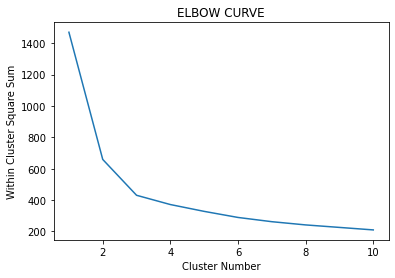

In [25]:
#Finding the optimum clusters using the ELBOW CURVE
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Cluster Number")
plt.ylabel("Within Cluster Square Sum")
plt.show()

In [26]:
kmean = KMeans(n_clusters=3,random_state=0)
y_kmean_clustering = kmean.fit_predict(X)

In [27]:
y_kmean_clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['Cluster']=pd.Series(y_kmean_clustering)

In [30]:
df
#Now we can also add Cluster number to the dataset also

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1
